In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("customer .csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Business Questions
### - What is the ratio between males and females in our company?

<AxesSubplot:>

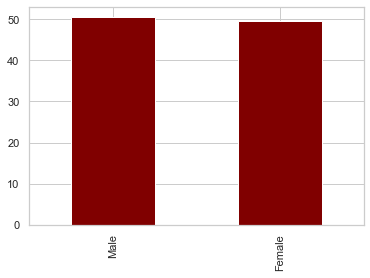

In [3]:
sns.set_theme(style="whitegrid")        # To add lines to the background adding more details
x = round(df['gender'].value_counts()/df.shape[0]*100,2) # Rounds the value of the percentage of males and females to nearest 2 decimals
x.plot.bar(color ='maroon')  # plotting the ratio

### - What is the ratio between Senior Citizens and others in our company?

<AxesSubplot:ylabel='SeniorCitizen'>

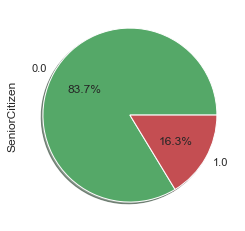

In [4]:
(df['SeniorCitizen'].value_counts()/df.shape[0]*100).plot.pie(autopct = '%1.1f%%',shadow=True, colors='green')

### - What is the ratio between who has partners and not in our company?

D:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-5-233a7f5f2810>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['partner'] = data.apply(partner , axis = 1)


<AxesSubplot:ylabel='partner'>

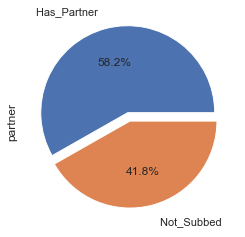

In [5]:
#Copying our original data base into a new one to edit values
data= df[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines','InternetService',
          'tenure', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn' , 'StreamingMovies' , 'StreamingTV']]

#Replacing values of data in our new dataset
data.replace("Yes", 1 , inplace = True)
data.replace("No", 0 , inplace = True)
data.replace("Female", 1 , inplace = True)
data.replace("Male", 0 , inplace = True)   

def partner(row):
    if row['Partner'] == 1 :
        return " Has_Partner "
    elif row['Churn'] == 0 :
        return " Not_Subbed "

data['partner'] = data.apply(partner , axis = 1)
round(data['partner'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%' , labeldistance =1.2 , explode=(0.1,0))

### - What is the ratio between who has dependents and not in our company?

<ipython-input-6-317419d3fa1f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dependent'] = data.apply(Dependent , axis = 1)


<AxesSubplot:ylabel='Dependent'>

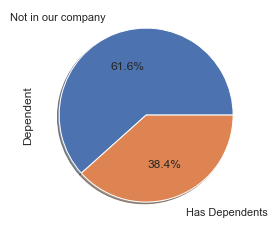

In [6]:
def Dependent(row):
    if row['Dependents'] == 1 :
        return " Has Dependents "
    elif row["Churn"] == 0 :
        return " Not in our company "

data['Dependent'] = data.apply(Dependent , axis = 1)
round(data['Dependent'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%' , labeldistance =1.2 , shadow=True )


In [7]:
data

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,StreamingMovies,StreamingTV,partner,Dependent
0,1,NaN,1,0,No phone service,DSL,NaN,Electronic check,29.85,29.85,0,0,0,Has_Partner,Not in our company
1,0,NaN,0,0,0,DSL,34.0,Mailed check,56.95,1889.50,0,0,0,Not_Subbed,Not in our company
2,0,NaN,0,0,0,DSL,2.0,Mailed check,53.85,108.15,1,0,0,None,None
3,0,NaN,0,0,No phone service,DSL,45.0,Bank transfer (automatic),42.30,1840.75,0,0,0,Not_Subbed,Not in our company
4,1,NaN,0,0,0,Fiber optic,2.0,Electronic check,70.70,151.65,1,0,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.0,1,1,1,DSL,24.0,Mailed check,84.80,1990.50,0,1,1,Has_Partner,Has Dependents
7039,1,0.0,1,1,1,Fiber optic,72.0,Credit card (automatic),103.20,7362.90,0,1,1,Has_Partner,Has Dependents
7040,1,0.0,1,1,No phone service,DSL,11.0,Electronic check,29.60,346.45,0,0,0,Has_Partner,Has Dependents
7041,0,1.0,1,0,1,Fiber optic,4.0,Mailed check,74.40,306.60,1,0,0,Has_Partner,None


### - What is the ratio between who has MultipleLines and not in our company?

<ipython-input-8-e18ad8aa893d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HasLine'] = data.apply(HasLine , axis = 1)


<AxesSubplot:ylabel='HasLine'>

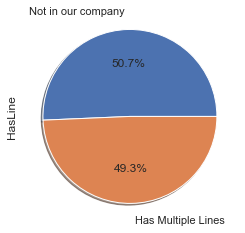

In [8]:
def HasLine(row):
    if row['MultipleLines'] == 1 :
        return " Has Multiple Lines "
    if row["Churn"] == 0 :
        return " Not in our company "

data['HasLine'] = data.apply(HasLine , axis = 1)
round(data['HasLine'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%' , labeldistance =1.2 , shadow=True )

# Ratio is pretty much 50%/50% which is not good so, we have to provide multiple lines service to our customers more

### - Depending on the correlation matrix, which variables have a strong relationship with each other?

<AxesSubplot:>

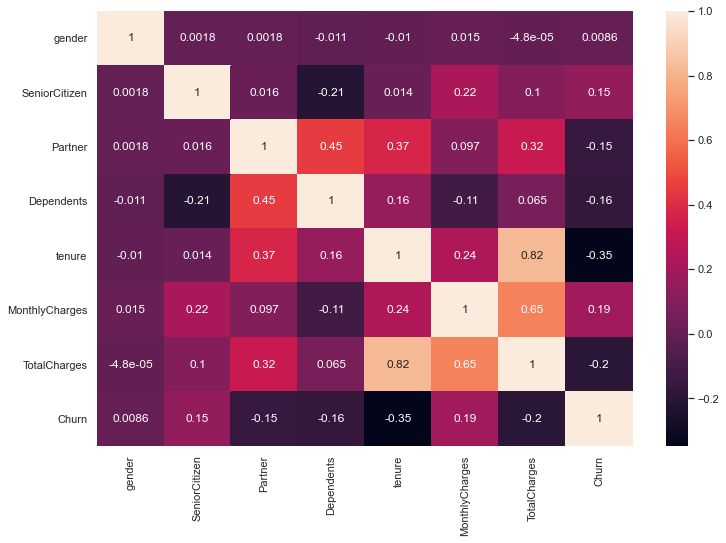

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True)

# MonthlyCharges and tenure have the highest correlation out of all
# MonthlyCharges and Total charges also have a relatively high correlation which makes sense
# Dependents and TotalCharges have a high correlation

### - From the previous question,What is the relationship between the Internet Services and the churn rate?

In [10]:
df['InternetService'].unique()       #Checking types of internet services
data.replace("Fiber optic", 1 , inplace = True)  #Replacing values of the internet services by numerics
data.replace("DSL", 2 , inplace = True)
data

D:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,StreamingMovies,StreamingTV,partner,Dependent,HasLine
0,1,NaN,1,0,No phone service,2,NaN,Electronic check,29.85,29.85,0,0,0,Has_Partner,Not in our company,Not in our company
1,0,NaN,0,0,0,2,34.0,Mailed check,56.95,1889.50,0,0,0,Not_Subbed,Not in our company,Not in our company
2,0,NaN,0,0,0,2,2.0,Mailed check,53.85,108.15,1,0,0,None,None,None
3,0,NaN,0,0,No phone service,2,45.0,Bank transfer (automatic),42.30,1840.75,0,0,0,Not_Subbed,Not in our company,Not in our company
4,1,NaN,0,0,0,1,2.0,Electronic check,70.70,151.65,1,0,0,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.0,1,1,1,2,24.0,Mailed check,84.80,1990.50,0,1,1,Has_Partner,Has Dependents,Has Multiple Lines
7039,1,0.0,1,1,1,1,72.0,Credit card (automatic),103.20,7362.90,0,1,1,Has_Partner,Has Dependents,Has Multiple Lines
7040,1,0.0,1,1,No phone service,2,11.0,Electronic check,29.60,346.45,0,0,0,Has_Partner,Has Dependents,Not in our company
7041,0,1.0,1,0,1,1,4.0,Mailed check,74.40,306.60,1,0,0,Has_Partner,None,Has Multiple Lines


<AxesSubplot:>

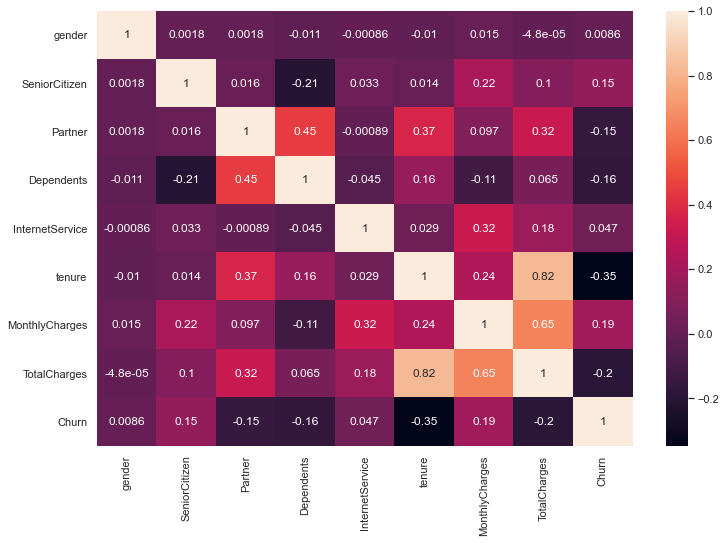

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True)

#They have a very weak relationship  0.047 correlation

### - How many Internet Services we provide in our company? - list names and ratio please -

<AxesSubplot:ylabel='InternetService'>

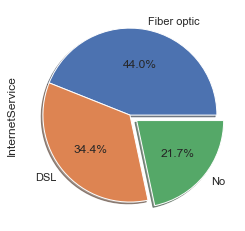

In [12]:
Internet = df['InternetService'].value_counts()
Internet.plot.pie(autopct = '%1.1f%%',shadow=True , explode = (0, 0, 0.1))

### - What is our Contract types we provide? - names and ratio please-

<AxesSubplot:ylabel='Contract'>

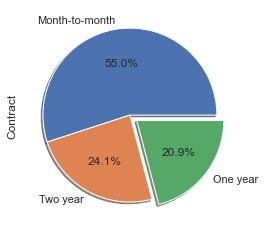

In [13]:
Contract = df['Contract'].value_counts()
Contract.plot.pie(autopct = '%1.1f%%',shadow=True ,explode = (0, 0, 0.1)) # Explode parameter gives an effect to a pie section

### - How many customers uses StreamingTV ?

<AxesSubplot:ylabel='StreamingTV'>

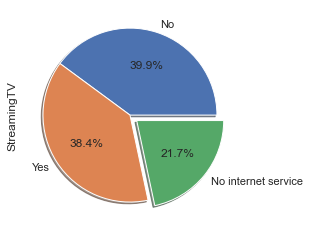

In [14]:
(df['StreamingTV'].value_counts()/df.shape[0]*100).plot.pie(autopct = '%1.1f%%',shadow=True,explode = (0, 0, 0.1))
#Only 38.4% uses StreamingTV which needs further improvement
#21.7% Have no internet service which is a bad sign

### - What is the ratio between users who streaming movies to StreamingTV subscribers?

<ipython-input-15-08340cfec4d9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Streaming'] = data.apply(Streaming , axis = 1)


<AxesSubplot:ylabel='Streaming'>

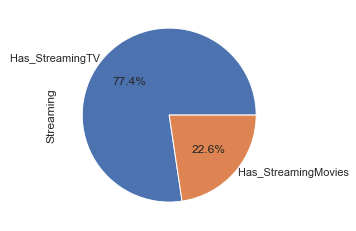

In [15]:
def Streaming(row):
    if row['StreamingTV'] == 1:
        return " Has_StreamingTV "
    elif row['StreamingMovies'] == 1:
        return " Has_StreamingMovies"

data['Streaming'] = data.apply(Streaming , axis = 1)
round(data['Streaming'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%' , labeldistance =1.0)

### - Is there a strong relationship between the monthly recharge rate and the dependents?

<AxesSubplot:>

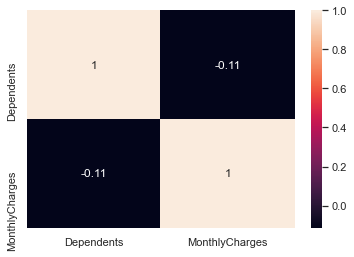

In [16]:
Dep_Charge = data[['Dependents',"MonthlyCharges"]]
sns.heatmap(Dep_Charge.corr(), annot = True)

#Not a strong relationship so, we need to provide offers for our customers who have dependents

### - How many payment methods we provide? and what is the ratio between each others?

In [17]:
len(df['PaymentMethod'].unique())

4

<AxesSubplot:>

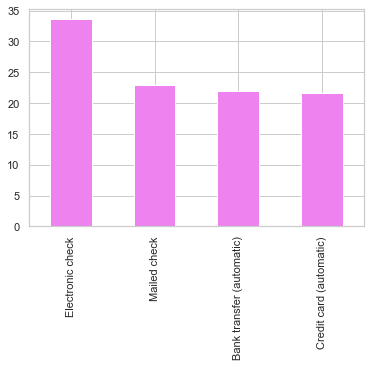

In [18]:
#We provide 4 payment methods their ratios: 
round(df['PaymentMethod'].value_counts()/df.shape[0]*100,2).plot.bar(color="violet")

<AxesSubplot:ylabel='PaymentMethod'>

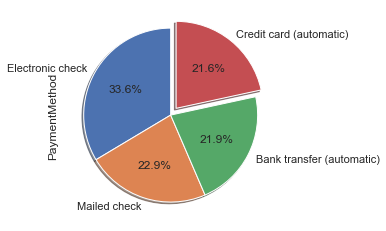

In [19]:
round(df['PaymentMethod'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = '%1.1f%%',shadow=True,explode = (0, 0, 0,0.1)
                                                                    ,startangle=90) 
# To move the labels away from y-axis text i used startangle=90

### - What is our churn rate?

<AxesSubplot:ylabel='Churn'>

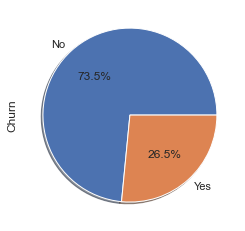

In [20]:
round(df['Churn'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = '%1.1f%%',shadow=True )
#Really bad ratio that must be improved

### - What is the average monthly charge?

In [21]:
df['MonthlyCharges'].mean()

64.76169246059922

### - From the correlation matrix ,What is the relationship between the Senior Citizens and the monthly charging rate?

<AxesSubplot:>

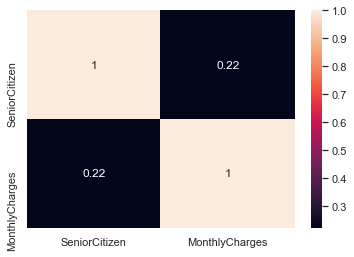

In [22]:
Senior_Charge = data[['SeniorCitizen',"MonthlyCharges"]]
sns.heatmap(Senior_Charge.corr(), annot = True)

#Weak relationship due to having 0.22 correlation

# ------- #
### - We want to give offers according to the monthly charge categories, can you explain that? Using Visulization 


In [23]:
df['MonthlyCharges'].max()

118.75

<ipython-input-24-40a6f2796365>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Monthly_Offer'] = data.apply(Monthly_Offer , axis = 1)


<AxesSubplot:ylabel='Monthly_Offer'>

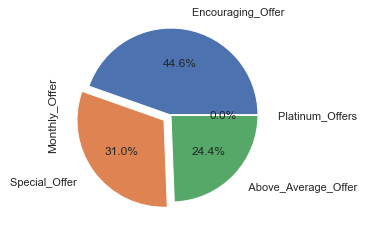

In [24]:
#We can give out encouraging offers for Monthly charges that are below average <65 and give above average monthly charges 
#bonuses and special offers according to how much they pay
def Monthly_Offer(row):
      if row['MonthlyCharges'] < 65 :
        return " Encouraging_Offer "
      elif row['MonthlyCharges'] >= 65 and row['MonthlyCharges']<=85 :
        return " Above_Average_Offer"
      elif row['MonthlyCharges'] >=85 and row ['MonthlyCharges'] < 118:
        return " Special_Offer "
      elif row["MonthlyCharges"] == 118.75:         #Max MonthlyCharges paid
        return " Platinum_Offers "
    
data['Monthly_Offer'] = data.apply(Monthly_Offer , axis = 1)
round(data['Monthly_Offer'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%' , labeldistance =1.2 , explode = (0, 0.1, 0,0))

### - We want to present offers by gender and the Senior Citizen, could you explain that? Using Visulization 

<ipython-input-25-6d872377c263>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender_offer'] = data.apply(gender_offer , axis = 1)


<AxesSubplot:ylabel='gender_offer'>

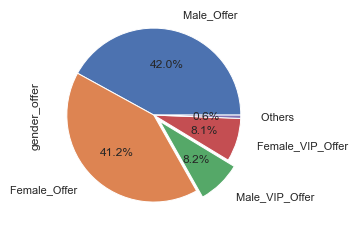

In [25]:
def gender_offer(row):
      if row['gender'] == 0 and row ['SeniorCitizen'] == 1:
        return " Male_VIP_Offer "
      elif row['gender'] == 0 and row ['SeniorCitizen'] == 0:
        return " Male_Offer "
      elif row['gender'] == 1 and row ['SeniorCitizen'] == 1:
        return " Female_VIP_Offer "
      elif row['gender'] == 1 and row ['SeniorCitizen'] == 0:
        return " Female_Offer "
      else :
        return " Others"
    
data['gender_offer'] = data.apply(gender_offer , axis = 1)
round(data['gender_offer'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%' , labeldistance =1.2 ,explode=(0,0,0.1,0,0) )

## Whats App Business Questions

### -Finding a relation between payment method & monthly charges, and their effect on churn

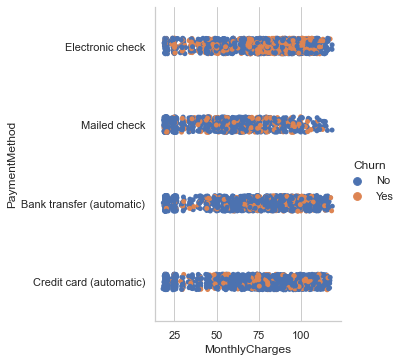

In [46]:
sns.catplot(x="MonthlyCharges", y="PaymentMethod", hue="Churn",data=df)
#Churn and monthlycharges aren't consistant enough in the back transfer payment method

### -What is the relation between monthly charges and online security? 


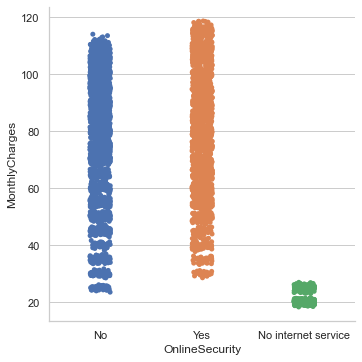

In [48]:
sns.catplot(y="MonthlyCharges", x="OnlineSecurity",data=df)
#Customers with online security pay more than those who doesn't have online security and those who don't have internet service
#don't even pay more than 30 monthly
#### IMPORTANT ####

### - What is the relation between contract and total charges?

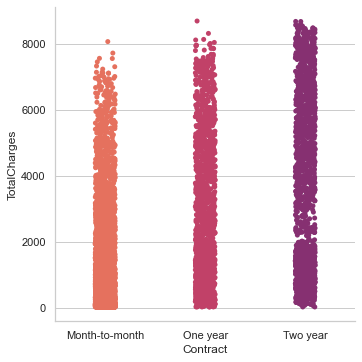

In [50]:
sns.catplot(y="TotalCharges", x="Contract",data=df,palette="flare")
#People who have a 2-year contract pay les in the 2000-3000 area but pay much more than other contracts in the +7000 area
#Sol:Encourage people that have a Month-to-month contract / a one year contract to write a 2 year contract by giving them discounts
#on their plan

### - What is the relation between tech support and monthly charges with respect to churn

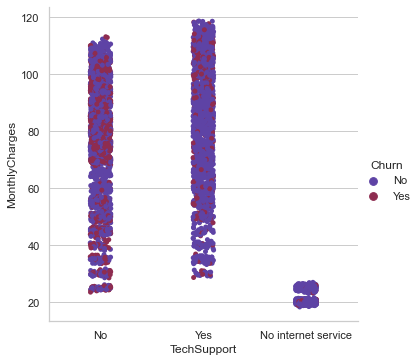

In [57]:
sns.catplot(y="MonthlyCharges", x="TechSupport",hue="Churn",data=df,palette="twilight")
#Same as online security with minor differences

### - Ratio between contract types

<AxesSubplot:ylabel='Contract'>

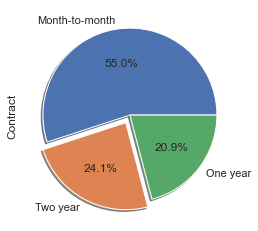

In [59]:
(df['Contract'].value_counts()/df.shape[0]*100).plot.pie(autopct = '%1.1f%%',shadow=True, explode=(0,0.1,0))

# - Conclusion 

#### Pros: 
- Not a bad monthly average charge
- A lot of services are provided
- A good percentage of our customers have a 2-year contract

#### Cons:
- More than 50% of our customers have a Month-to-month contract
- We still have a decent amount of our customers who don't have an internet service
- We need to provide more customers with our services to make more total income
- Only 38.4% uses StreamingTV which needs further improvement
- Our Churn rate needs alot of improvement
- We don't have alot of senior citizens

#### Business Solution:
- Most of our problems can actually be solved by providing specific offers to the right category of people as mentioned above
- We can encourage people to prolong their contracts by giving them discounts on our services which will actually help our services improve also (2 birds 1 stone)
- We should send customers who have Partners a promotion code to win over their partner and gain another customer
- Improve our services to encourage people to subscribe to them which will also positively impact our churn rate
- Improve our bank transfer payment methods which had some inconsistencies (minor problem)
- We should work on providing ALL of our customers with internet service as this will positively impact each and every aspect of our company (IMPORTANT)